This can be run [run on Google Colab using this link](https://colab.research.google.com/github/CS7150/CS7150-Homework-2/blob/main/HW2_2_CIFAR10Classifier.ipynb)

<font size='6'>**Homework 2.2: Neural Network CIFAR-10 Classification**</font>

<font size='5'>**Overview**</font>

In this CS7150 assignment, our objective is to build a neural network featuring two fully-connected layers designed for classification purposes. We will evaluate the performance of this neural network by testing it on the CIFAR-10 dataset.

This assignment adheres to a standard classification setup, which encompasses the use of a dataloader to load labeled image data in a natural form and training the model in a minibatch-based fashion.

**Your assignment**: Your responsibility throughout this notebook is to thoroughly review the content and address all the conceptual and technical questions identified within the sections marked with "Task" headers and "TODO:" comments in the code.

<font size='5'>**I) Setup**</font>

In [2]:
import os
import torch
from torch import nn
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

<font size='4'>**Device Setup**</font>


We aim to enable model training on a GPU to expedite our computations. First, we'll check whether torch.cuda is accessible; if it is, we will utilize the GPU; otherwise, we will continue to using the CPU.

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


<font size='4'>**Loading CIFAR-10 Data**</font>

The CIFAR-10 dataset comprises a collection of 60,000 32x32 color images distributed across ten distinct classes. These classes correspond to various objects and include airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. Within each class, there are precisely 6,000 images.

In [4]:
# downloading cifar10 into folder
data_dir = 'cifar10_data' # make sure that this folder is created in your working dir

#TODO: Fill out train_data and test_data variables using CIFAR10 (i.e., torchvision.datasets.CIFAR)
train_data = CIFAR10(data_dir, train=True, download=True, transform=Compose([ToTensor()]))
test_data = CIFAR10(data_dir, train=False, download=True, transform=Compose([ToTensor()]))
#train_data = None
#test_data = None
print(f'Datatype of the dataset object: {type(train_data)}')
# check the length of dataset
print(f'Number of samples in training data: {len(train_data)}')
print(f'Number of samples in test data: {len(test_data)}')
# Check the format of dataset
print(f'Format of the dataset: \n {train_data}')

100%|██████████| 170498071/170498071 [00:05<00:00, 29743991.20it/s]


Extracting cifar10_data/cifar-10-python.tar.gz to cifar10_data
Files already downloaded and verified
Datatype of the dataset object: <class 'torchvision.datasets.cifar.CIFAR10'>
Number of samples in training data: 50000
Number of samples in test data: 10000
Format of the dataset: 
 Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10_data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )


### <font size='4'>**Displaying Loaded Dataset**</font>

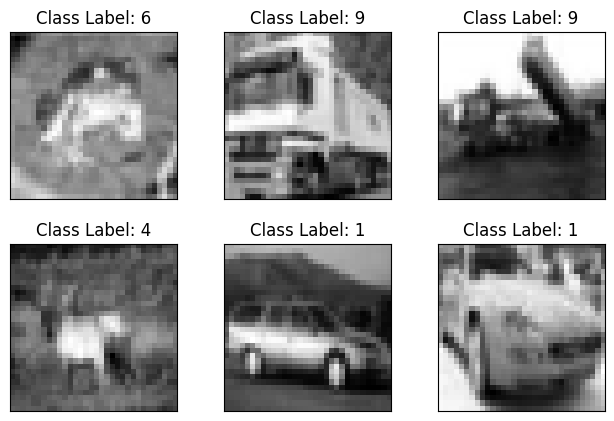

In [5]:
fig = plt.figure()
for i in range(6):
  plt.subplot(2, 3, i+1)
  plt.tight_layout()
  plt.imshow(train_data[i][0][0], cmap='gray', interpolation='none')
  plt.title("Class Label: {}".format(train_data[i][1]))
  plt.xticks([])
  plt.yticks([])

## <font size='5'>**II) Building a Neural Network**</font>

### <font size='4'>**1) Defining `CIFAR10Classifier` class**</font>

<font size='4' color='Red'>Task 1.1 - Defining `CIFAR10Classifier` class (4 points)</font>

In the following class, make adjustments to the following attributes: flatten, hidden_size, class_size, and linear_relu_stack. Ensure that the linear_relu_stack consists of a minimum of two linear layers combined with a non-linear activation layer.

In [6]:
class CIFAR10Classifier(nn.Module):
    def __init__(self):
        super(CIFAR10Classifier, self).__init__()
        ########################################################################
        # TODO: Complete the following variables as instructed earlier
        ########################################################################
        self.flatten = nn.Flatten()
        self.hidden_size = 32
        self.class_size = 10
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*32*3, 512),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 100),
            nn.LeakyReLU(),
            nn.BatchNorm1d(100),
            nn.Linear(100, 10),
            nn.Softmax(dim=1)
        )
        ########################################################################
        #                             END OF YOUR CODE                         #
        ########################################################################

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

### <font size='4'>**2) Training a Neural Network**</font>

<font size='4' color='Red'>Task 1.2 - Defining parameters (3 points)</font>

Let's create an instance of `CIFAR10Classifier` and move it to the device. After doing so, we define the following hyperparameters for training:

- **Number of Epochs**: This signifies the number of iterations over the dataset.
- **Batch Size**: It represents the number of data samples that propagate through the network before parameter updates.
- **Learning Rate**: This parameter determines the extent of model parameter updates during each batch/epoch. Smaller values lead to slower learning, while larger values may introduce instability during training.

**Your Task**:

1. Set `learning_rate` to 1e-3, `batch_size` to 64, and `epochs` to 10 initially. Experiment with different values and retain the final choices that yield the highest testing accuracy.

2. Select an appropriate loss function. You should experiment with different options, such as `CrossEntropyLoss()`, `MSELoss()`, and any others, and choose the one that best suits the task.

3. Define the `optimizer` variable using any optimizer function (e.g., SGD, Adam, etc.). Be sure to explore different parameter values within the chosen optimizer function.

4. Remember to record your ultimate choices for each variable that contribute to achieving the best performance for your `CIFAR10Classifier`. To receive full credit for this assignment, your model should attain a classification accuracy of over 50% on the test set.

In [7]:
from torch.nn.modules.loss import BCELoss
model = CIFAR10Classifier().to(device)
model.requires_grad_(True)

########################################################################
# TODO: Complete the following variables as instructed earlier
########################################################################

learning_rate = 1e-3
batch_size = 128
epochs = 15
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

########################################################################
#                             END OF YOUR CODE                         #
########################################################################

### <font size='4'>**3) Train Loop**</font>

In [8]:
train_dataloader = DataLoader(train_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

In the above cell, we used a Dataloader to create batches for training and testing data. For each batch of size indicated in the batch_size hyperparameter, we perform backprop and update the model parameters' weights and biases.

In the following cell, we define our train_loop.

In [9]:
def train_loop(dataloader, model, loss_fn, optimizer, print_log=True):
    size = len(dataloader.dataset)
    correct = 0
    training_acc = 0
    training_loss = 0
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X.to(device))
        loss = loss_fn(pred, y.to(device))
        correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss, current = loss.item(), batch * len(X)
        training_loss = loss
        if (print_log==True) and (batch % 100 == 0):
            print(f"""Training loop: loss: {loss:>7f}  [{current:>5d}/{size:>5d}]""")
    correct /= size
    training_acc = 100*correct
    if (print_log==True):
        print(f"""Training Accuracy: {training_acc:>0.1f}%""")
    return training_acc, training_loss

### <font size='4'>**4) Test Loop**</font>

In the test loop, we iterate over the test dataset to check if model performance is improving.

In [10]:
def test_loop(dataloader, model, loss_fn, print_log=True):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X.to(device))
            test_loss += loss_fn(pred, y.to(device)).item()
            correct += (pred.argmax(1) == y.to(device)).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    testing_acc = 100*correct
    if (print_log==True):
        print(f"Testing Accuracy: {testing_acc:>0.1f}%, Avg loss: {test_loss:>8f} \n")
    return testing_acc, test_loss

### <font size='4'>**5) Running the loops**</font>

We run our loops for a certain number of times, which is indicated in the 'epoch' hyperparameter that we defined earlier. In the following cell, we run both our training and testing loop to see how our training and testing accuracies change over time.

In [11]:
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Training loop: loss: 2.299207  [    0/50000]
Training loop: loss: 2.084344  [12800/50000]
Training loop: loss: 2.060425  [25600/50000]
Training loop: loss: 2.062754  [38400/50000]
Training Accuracy: 38.7%
Testing Accuracy: 42.7%, Avg loss: 2.033321 

Epoch 2
-------------------------------
Training loop: loss: 2.089003  [    0/50000]
Training loop: loss: 2.019851  [12800/50000]
Training loop: loss: 2.019001  [25600/50000]
Training loop: loss: 2.014353  [38400/50000]
Training Accuracy: 44.8%
Testing Accuracy: 46.2%, Avg loss: 1.999424 

Epoch 3
-------------------------------
Training loop: loss: 2.027775  [    0/50000]
Training loop: loss: 1.963975  [12800/50000]
Training loop: loss: 1.987594  [25600/50000]
Training loop: loss: 1.978235  [38400/50000]
Training Accuracy: 48.5%
Testing Accuracy: 47.2%, Avg loss: 1.986086 

Epoch 4
-------------------------------
Training loop: loss: 1.996373  [    0/50000]
Training loop: loss: 1.971699  [12800/5000

## <font size='5'>**III) Fine Tuning Hyperparameters**</font>

Adjusting the hyperparameters and gaining a deeper understanding of how they impact the ultimate performance is a substantial aspect of working with neural networks. Therefore, we encourage you to gain practical experience in this regard.

In this task, your goal is to play around with different settings for various options like layer size, batch size, learning rate. You should also experiment with optimizer hyperparameters including momentum, weight decay and more.

To understand how these choices affect your model's performance, you'll create at least three graphs. Each graph will show how changing one of these options (except for epochs) impacts how well your model learns and predicts.

## <font size='4'>**Example** - We've given you an example code for changing number of epochs so you can see how it's done.</font>

Training loop: loss: 2.312804  [    0/50000]
Training loop: loss: 2.278205  [ 6400/50000]
Training loop: loss: 2.235496  [12800/50000]
Training loop: loss: 2.257160  [19200/50000]
Training loop: loss: 2.187397  [25600/50000]
Training loop: loss: 2.216529  [32000/50000]
Training loop: loss: 2.222332  [38400/50000]
Training loop: loss: 2.205257  [44800/50000]
Training Accuracy: 25.5%
Testing Accuracy: 32.3%, Avg loss: 2.183381 

Training loop: loss: 2.297219  [    0/50000]
Training loop: loss: 2.283755  [ 6400/50000]
Training loop: loss: 2.234107  [12800/50000]
Training loop: loss: 2.250765  [19200/50000]
Training loop: loss: 2.191514  [25600/50000]
Training loop: loss: 2.203658  [32000/50000]
Training loop: loss: 2.198428  [38400/50000]
Training loop: loss: 2.198566  [44800/50000]
Training Accuracy: 26.1%
Testing Accuracy: 30.8%, Avg loss: 2.183955 

Training loop: loss: 2.246082  [    0/50000]
Training loop: loss: 2.191256  [ 6400/50000]
Training loop: loss: 2.119070  [12800/50000]
Tra

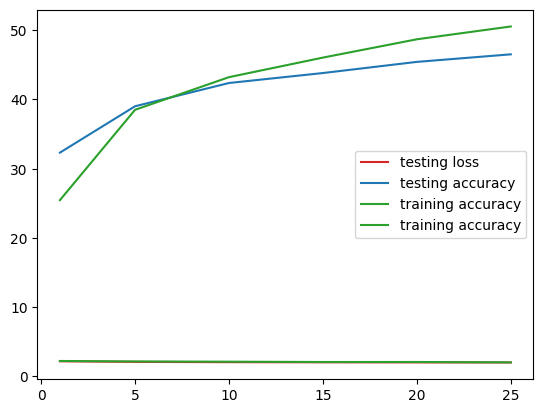

In [16]:
learning_rate = 1e-3
batch_size = 64
epochs = [1, 5, 10, 15, 20, 25]
momentum = 0
weight_decay = 0
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for e in epochs: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    model = CIFAR10Classifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate,
                            momentum = momentum,
                            weight_decay = weight_decay,
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(e):
        # print(f"Currently running epoch {t+1}")
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss)
    training_accs.append(final_train_acc)
plt.plot(epochs,test_losses, color ='tab:red', label='testing loss')
plt.plot(epochs,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(epochs,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")


<font size='4' color='Red'>Task 1.3 - Experiment 1 (2 point)</font>

$$\text{I am tuning ______________ hyperparameter for better performance}$$

Done!


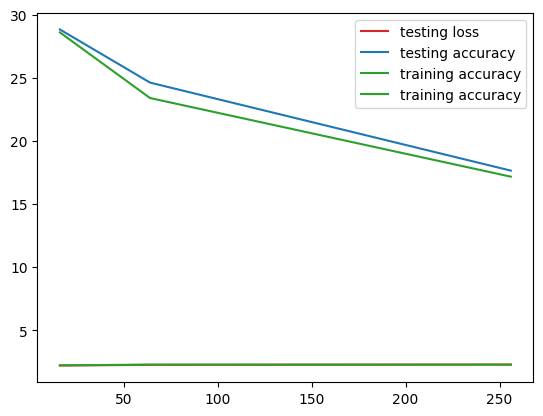

In [17]:
############################################################################
# TODO: Implement your code here
############################################################################
learning_rate = 1e-3
batch_size = [16, 64, 256]
epochs = 15
momentum = 0.9
weight_decay = 1e-3
dampening = 0.999

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for size in batch_size: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    model = CIFAR10Classifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate,
                            momentum = momentum,
                            weight_decay = weight_decay,
                            dampening = dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=size)
    test_dataloader = DataLoader(test_data, batch_size=size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(epochs):
        # print(f"Currently running epoch {t+1}")
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss)
    training_accs.append(final_train_acc)
plt.plot(batch_size,test_losses, color ='tab:red', label='testing loss')
plt.plot(batch_size,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(batch_size,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")


############################################################################
#                             END OF YOUR CODE                             #
############################################################################


<font size='4' color='Red'>Task 1.3 - Experiment 2 (2 point)</font>

$$\text{I am tuning ______________ hyperparameter for better performance}$$

Done!


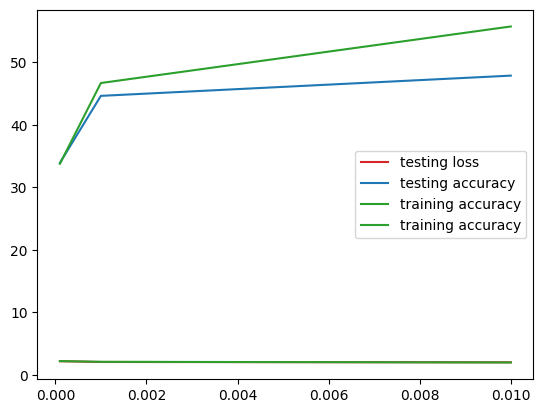

In [18]:
############################################################################
# TODO: Implement your code here
############################################################################
learning_rate = [1e-4,1e-3,1e-2]
batch_size = 64
epochs = 15
momentum = 0
weight_decay = 0
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for lr in learning_rate: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    model = CIFAR10Classifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(),
                            lr = lr,
                            momentum = momentum,
                            weight_decay = weight_decay,
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(epochs):
        # print(f"Currently running epoch {t+1}")
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log=False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss)
    training_accs.append(final_train_acc)
plt.plot(learning_rate,test_losses, color ='tab:red', label='testing loss')
plt.plot(learning_rate,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(learning_rate,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")



############################################################################
#                             END OF YOUR CODE                             #
############################################################################


<font size='4' color='Red'>Task 1.4 - Experiment 3 (2 point)</font>

$$\text{I am tuning ______________ hyperparameter for better performance}$$

Done!


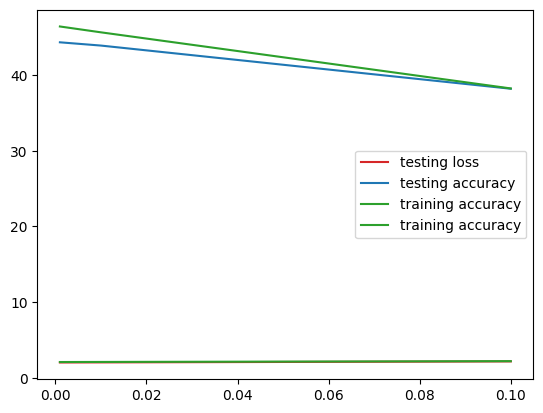

In [19]:
############################################################################
# TODO: Implement your code here
############################################################################
learning_rate = 1e-3
batch_size = 64
epochs = 15
momentum = 0
weight_decay = [1e-3,1e-2,1e-1]
dampening = 0

# Train and Test
test_accs = []
test_losses = []
training_accs = []
for decay in weight_decay: #Would change this to reflect whatever hyperparameter you would be testing
    # Model
    model = CIFAR10Classifier().to(device)
    model.requires_grad_(True)
    # Optimizer
    optimizer = torch.optim.SGD(model.parameters(),
                            lr = learning_rate,
                            momentum = momentum,
                            weight_decay = decay,
                            dampening= dampening)
    # Loss Func
    loss_fn = nn.CrossEntropyLoss()
    # Dataloaders
    train_dataloader = DataLoader(train_data, batch_size=batch_size)
    test_dataloader = DataLoader(test_data, batch_size=batch_size)
    final_train_acc = 0
    final_test_acc = 0
    final_test_loss = 0
    for t in range(epochs):
        # print(f"Currently running epoch {t+1}")
        training_acc = train_loop(train_dataloader, model, loss_fn, optimizer, print_log= False)
        testing_acc, test_loss =  test_loop(test_dataloader, model, loss_fn, print_log=False)
        final_test_acc = testing_acc
        final_test_loss = test_loss
        final_train_acc = training_acc
    test_accs.append(final_test_acc)
    test_losses.append(final_test_loss)
    training_accs.append(final_train_acc)
plt.plot(weight_decay,test_losses, color ='tab:red', label='testing loss')
plt.plot(weight_decay,test_accs, color ='tab:blue', label='testing accuracy')
plt.plot(weight_decay,training_accs, color ='tab:green', label='training accuracy')
plt.legend()
print("Done!")


############################################################################
#                             END OF YOUR CODE                             #
############################################################################